In [10]:
from matplotlib import pyplot as plt 
import numpy as np  
%matplotlib inline

In [11]:
import sys
sys.path.append('../lib')
from simlib import *

In [12]:
ts, xs, bins, bin_edges = simulate(method='langevin', num_particles=10000, max_t=10)

In [13]:
sim_MSD, sim_stdev = MSD(xs)

In [14]:
m, cov = np.polyfit(ts[:-1], sim_MSD, 1, cov=True)

In [18]:
a = np.sqrt(np.diag(cov))
m[0], a[0]

(1.9964362955597736, 0.0018606932487211696)

In [42]:
ms1, stdevs1 = [], []
ms2, stdevs2 = [], []
Ds = np.arange(0.1, 5.5, 0.5)
for D in Ds:
    ts1, xs1, _, _ = simulate(method='langevin', num_particles=10000, max_t=20, D=D)
    ts2, xs2, _, _ = simulate(method='smol',     num_particles=10000, max_t=20, D=D)
    sim_MSD1, sim_stdev1 = MSD(xs1)
    sim_MSD2, sim_stdev2 = MSD(xs2)
    m1, cov1 = np.polyfit(ts1[:-1], sim_MSD1, 1, cov=True)
    m2, cov2 = np.polyfit(ts2[:-1], sim_MSD2, 1, cov=True)
    ms1.append(m1[0])
    ms2.append(m2[0])
    stdev1 = np.sqrt(np.diag(cov1))[0]
    stdev2 = np.sqrt(np.diag(cov2))[0]
    stdevs1.append(stdev1)
    stdevs2.append(stdev2)

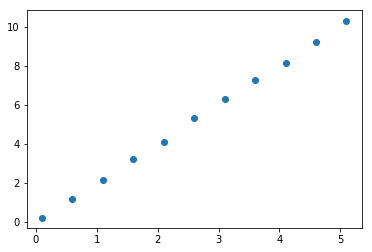

In [43]:
plt.errorbar(Ds, ms1, yerr=stdevs1, fmt='o')
plt.plot(Ds, ms1, '*')

#plt.plot(Ds, ms2, '*')

In [50]:
with open('../data/MSD_linear_fit', 'w') as f:
    for D, m1, err1, m2, err2 in zip(Ds, ms1, stdevs1, ms2, stdevs2):
        f.write('{} {} {} {} {}\n'.format(D, m1, err1, m2, err2))